In [1]:
#import library
import os
import numpy as np
import pickle
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, matthews_corrcoef, cohen_kappa_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#opening pickle file of augmented added data
with open('/content/drive/Shareddrives/SignLanguageData/combined_augmented_data_v2.pkl','rb') as f:
    X_train,y_train,X_test,y_test = pickle.load(f)

In [4]:
# #opening pickle file of augmented added data
# with open('../data/external/combined_augmented_data_v2.pkl','rb') as f:
#     X_train,y_train,X_test,y_test = pickle.load(f)

In [5]:
#printing shapes 
print(f'X_train Shape: {X_train.shape}')
print(f'y_train Shape: {y_train.shape}')
print(f'X_test Shape: {X_test.shape}')
print(f'y_test Shape: {y_test.shape}')

X_train Shape: (109820, 28, 28)
y_train Shape: (109820,)
X_test Shape: (28688, 28, 28)
y_test Shape: (28688,)


In [6]:
#fuction to find the indices given a label 
def find_indices(data,label):
    #check if data is numpy array
    if type(data) == np.ndarray:
        #return indices
        return np.where(data==label)
    #check if data is pandas series 
    elif type(data) == pd.Series:
        #return indices
        return data[data==label].index
    #else not supported in this function
    else:
        raise Exception('Not supported data type for this function.')

In [7]:
#letters
letters = ['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y']
#numbers 
numbers = sorted(list(np.unique(y_train.astype(int))))
#dictionary of labels 
labels = dict(zip(numbers,letters))

In [8]:
print(y_train)
print(labels)

[ 3.  3.  3. ... 18. 17. 23.]
{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y'}


In [9]:
y_train = y_train.astype(int)
print(y_train)

[ 3  3  3 ... 18 17 23]


In [10]:
# Reshape the data to (num_samples, 784)
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
y_train = y_train
y_test = y_test
# Print the shapes of the augmented data
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (109820, 784)
y_train shape: (109820,)
X_test shape: (28688, 784)
y_test shape: (28688,)


In [11]:
#standardized data 
#using sklearn standard scaler model and fitting on training data 
sc = StandardScaler().fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [12]:
#normalized data 
X_train_norm = X_train/255 
X_test_norm = X_test/255

#### Applying naive bayes 

In [ ]:
gnb = GaussianNB()

In [ ]:
# applying NB on normalized train data
y_pred_nm = gnb.fit(X_train_norm, y_train).predict(X_train_norm)

print(f"Accuracy: {accuracy_score(y_train, y_pred_nm)}")
print("Classification report:")
print(classification_report(y_train, y_pred_nm, target_names=letters))

Accuracy: 0.21761063558550356
Classification report:
              precision    recall  f1-score   support

           A       0.45      0.19      0.27      4504
           B       0.46      0.19      0.27      4040
           C       0.63      0.43      0.51      4576
           D       0.37      0.08      0.14      4784
           E       0.27      0.34      0.30      3828
           F       0.30      0.13      0.18      4816
           G       0.47      0.29      0.36      4360
           H       0.67      0.13      0.22      4052
           I       0.18      0.38      0.24      4648
           K       0.25      0.30      0.27      4456
           L       0.38      0.25      0.30      4964
           M       0.34      0.07      0.12      4220
           N       0.43      0.04      0.08      4604
           O       0.39      0.26      0.31      4784
           P       0.10      0.65      0.17      4352
           Q       0.40      0.28      0.33      5116
           R       0.18     

In [ ]:
# applying NB on normalized test data
y_pred_nm = gnb.fit(X_train_norm, y_train).predict(X_test_norm)

print(f"Accuracy: {accuracy_score(y_test, y_pred_nm)}")
print("Classification report:")
print(classification_report(y_test, y_pred_nm, target_names=letters))

Accuracy: 0.19739960959286112
Classification report:
              precision    recall  f1-score   support

           A       0.44      0.17      0.24      1324
           B       0.58      0.15      0.24      1728
           C       0.55      0.31      0.40      1240
           D       0.35      0.09      0.15       980
           E       0.38      0.30      0.34      1992
           F       0.29      0.14      0.19       988
           G       0.43      0.30      0.35      1392
           H       0.79      0.12      0.21      1744
           I       0.11      0.28      0.16      1152
           K       0.25      0.27      0.26      1324
           L       0.30      0.21      0.25       836
           M       0.30      0.05      0.09      1576
           N       0.28      0.04      0.07      1164
           O       0.28      0.21      0.24       984
           P       0.13      0.71      0.22      1388
           Q       0.21      0.25      0.22       656
           R       0.09     

In [ ]:
# applying NB on standerdized data
y_pred_sc = gnb.fit(X_train_sc, y_train).predict(X_train_sc)

print(f"Accuracy: {accuracy_score(y_train, y_pred_sc)}")
print("Classification report:")
print(classification_report(y_train, y_pred_sc, target_names=letters))

Accuracy: 0.21761063558550356
Classification report:
              precision    recall  f1-score   support

           A       0.45      0.19      0.27      4504
           B       0.46      0.19      0.27      4040
           C       0.63      0.43      0.51      4576
           D       0.37      0.08      0.14      4784
           E       0.27      0.34      0.30      3828
           F       0.30      0.13      0.18      4816
           G       0.47      0.29      0.36      4360
           H       0.67      0.13      0.22      4052
           I       0.18      0.38      0.24      4648
           K       0.25      0.30      0.27      4456
           L       0.38      0.25      0.30      4964
           M       0.34      0.07      0.12      4220
           N       0.43      0.04      0.08      4604
           O       0.39      0.26      0.31      4784
           P       0.10      0.65      0.17      4352
           Q       0.40      0.28      0.33      5116
           R       0.18     

In [ ]:
# applying NB on standerdized data
y_pred_sc = gnb.fit(X_train_sc, y_train).predict(X_test_sc)

print(f"Accuracy: {accuracy_score(y_test, y_pred_sc)}")
print("Classification report:")
print(classification_report(y_test, y_pred_sc, target_names=letters))

Accuracy: 0.19739960959286112
Classification report:
              precision    recall  f1-score   support

           A       0.44      0.17      0.24      1324
           B       0.58      0.15      0.24      1728
           C       0.55      0.31      0.40      1240
           D       0.35      0.09      0.15       980
           E       0.38      0.30      0.34      1992
           F       0.29      0.14      0.19       988
           G       0.43      0.30      0.35      1392
           H       0.79      0.12      0.21      1744
           I       0.11      0.28      0.16      1152
           K       0.25      0.27      0.26      1324
           L       0.30      0.21      0.25       836
           M       0.30      0.05      0.09      1576
           N       0.28      0.04      0.07      1164
           O       0.28      0.21      0.24       984
           P       0.13      0.71      0.22      1388
           Q       0.21      0.25      0.22       656
           R       0.09     

### Logistic regrassion

In [13]:
lr = LogisticRegression(max_iter=5000)

In [ ]:
# testing logistic regression on train data
y_pred_lr = lr.fit(X_train_sc, y_train).predict(X_train_sc)

print(f"Accuracy: {accuracy_score(y_train, y_pred_lr)}")
print("Classification report:")
print(classification_report(y_train, y_pred_lr, target_names=letters))


Accuracy: 0.6823711527954835
Classification report:
              precision    recall  f1-score   support

           A       0.71      0.75      0.73      4504
           B       0.77      0.78      0.77      4040
           C       0.87      0.87      0.87      4576
           D       0.64      0.60      0.62      4784
           E       0.74      0.70      0.72      3828
           F       0.69      0.67      0.68      4816
           G       0.77      0.76      0.76      4360
           H       0.72      0.68      0.70      4052
           I       0.66      0.70      0.68      4648
           K       0.68      0.71      0.69      4456
           L       0.67      0.74      0.70      4964
           M       0.64      0.58      0.61      4220
           N       0.64      0.61      0.63      4604
           O       0.78      0.77      0.77      4784
           P       0.75      0.79      0.77      4352
           Q       0.77      0.79      0.78      5116
           R       0.57      

In [ ]:
# testing logistic regression on test data
y_pred_lr_sc = lr.fit(X_train_sc, y_train).predict(X_test_sc)

print(f"Accuracy: {accuracy_score(y_test, y_pred_lr_sc)}")
print("Classification report:")
print(classification_report(y_test, y_pred_lr_sc, target_names=letters))


Accuracy: 0.5139431121026213
Classification report:
              precision    recall  f1-score   support

           A       0.56      0.64      0.60      1324
           B       0.75      0.65      0.70      1728
           C       0.75      0.71      0.73      1240
           D       0.43      0.53      0.48       980
           E       0.73      0.57      0.64      1992
           F       0.48      0.52      0.50       988
           G       0.62      0.57      0.59      1392
           H       0.78      0.57      0.66      1744
           I       0.42      0.45      0.43      1152
           K       0.55      0.52      0.53      1324
           L       0.50      0.74      0.60       836
           M       0.50      0.40      0.45      1576
           N       0.36      0.38      0.37      1164
           O       0.57      0.54      0.55       984
           P       0.77      0.72      0.75      1388
           Q       0.48      0.70      0.57       656
           R       0.10      

In [ ]:
#normalized data 
X_train_norm = X_train/255 
X_test_norm = X_test/255

In [ ]:
# applying logistic regression on normalized data
y_pred_lr_nm = lr.fit(X_train_norm, y_train).predict(X_test_norm)

print(f"Accuracy: {accuracy_score(y_test, y_pred_lr_nm)}")
print("Classification report:")
print(classification_report(y_test, y_pred_lr_nm, target_names=letters))


Accuracy: 0.5329754601226994
Classification report:
              precision    recall  f1-score   support

           A       0.57      0.65      0.61      1324
           B       0.77      0.66      0.71      1728
           C       0.75      0.71      0.73      1240
           D       0.47      0.55      0.50       980
           E       0.74      0.58      0.65      1992
           F       0.49      0.56      0.52       988
           G       0.63      0.58      0.61      1392
           H       0.81      0.58      0.68      1744
           I       0.44      0.47      0.45      1152
           K       0.54      0.49      0.51      1324
           L       0.51      0.78      0.62       836
           M       0.55      0.44      0.49      1576
           N       0.37      0.39      0.38      1164
           O       0.60      0.55      0.57       984
           P       0.80      0.78      0.79      1388
           Q       0.50      0.69      0.58       656
           R       0.11      

In [ ]:
# applying logistic regression on normalized data
y_pred_lr_nm = lr.fit(X_train_norm, y_train).predict(X_train_norm)

print(f"Accuracy: {accuracy_score(y_train, y_pred_lr_nm)}")
print("Classification report:")
print(classification_report(y_train, y_pred_lr_nm, target_names=letters))


Accuracy: 0.6718175195774905
Classification report:
              precision    recall  f1-score   support

           A       0.70      0.75      0.73      4504
           B       0.76      0.77      0.77      4040
           C       0.87      0.86      0.86      4576
           D       0.63      0.58      0.61      4784
           E       0.73      0.69      0.71      3828
           F       0.68      0.66      0.67      4816
           G       0.76      0.75      0.75      4360
           H       0.71      0.67      0.69      4052
           I       0.64      0.69      0.66      4648
           K       0.67      0.69      0.68      4456
           L       0.65      0.73      0.69      4964
           M       0.64      0.57      0.60      4220
           N       0.64      0.60      0.62      4604
           O       0.77      0.76      0.76      4784
           P       0.74      0.78      0.76      4352
           Q       0.76      0.77      0.77      5116
           R       0.56      

### LDA on SC data

In [14]:
#define sklearn LDA object 
lda = LinearDiscriminantAnalysis()
#fit on training data 
lda.fit(X_train_sc,y_train)

LinearDiscriminantAnalysis()

In [15]:
#fit on training data and transform
X_train_lda = lda.transform(X_train_sc)
X_test_lda = lda.transform(X_test_sc)

In [16]:
# testing logistic regression on train lda data
y_pred_lr = lr.fit(X_train_lda, y_train).predict(X_train_lda)

print(f"Accuracy: {accuracy_score(y_train, y_pred_lr)}")
print("Classification report:")
print(classification_report(y_train, y_pred_lr, target_names=letters))


Accuracy: 0.5857038790748498
Classification report:
              precision    recall  f1-score   support

           A       0.62      0.60      0.61      4504
           B       0.65      0.65      0.65      4040
           C       0.81      0.75      0.78      4576
           D       0.52      0.50      0.51      4784
           E       0.66      0.60      0.62      3828
           F       0.57      0.60      0.58      4816
           G       0.67      0.63      0.65      4360
           H       0.64      0.60      0.62      4052
           I       0.53      0.60      0.57      4648
           K       0.58      0.59      0.58      4456
           L       0.59      0.67      0.63      4964
           M       0.55      0.49      0.52      4220
           N       0.52      0.49      0.51      4604
           O       0.71      0.70      0.70      4784
           P       0.69      0.69      0.69      4352
           Q       0.69      0.73      0.71      5116
           R       0.45      

In [ ]:
# testing logistic regression on test data
y_pred_lr_test = lr.fit(X_train_lda, y_train).predict(X_test_lda)

print(f"Accuracy: {accuracy_score(y_test, y_pred_lr_test)}")
print("Classification report:")
print(classification_report(y_test, y_pred_lr_test, target_names=letters))


Accuracy: 0.4447852760736196
Classification report:
              precision    recall  f1-score   support

           A       0.48      0.55      0.51      1324
           B       0.68      0.51      0.58      1728
           C       0.77      0.64      0.70      1240
           D       0.39      0.46      0.42       980
           E       0.64      0.48      0.55      1992
           F       0.41      0.48      0.44       988
           G       0.53      0.47      0.50      1392
           H       0.73      0.48      0.58      1744
           I       0.35      0.38      0.37      1152
           K       0.40      0.40      0.40      1324
           L       0.50      0.75      0.60       836
           M       0.44      0.32      0.37      1576
           N       0.27      0.30      0.28      1164
           O       0.55      0.52      0.53       984
           P       0.76      0.64      0.70      1388
           Q       0.37      0.62      0.47       656
           R       0.07      

### Using best parameters

now we will use our best parameters for logistic regression which include regularization on data.

Best hyperparameters: {'C': 3.4647045830997407, 'max_iter': 3171, 'penalty': 'l2', 'solver': 'liblinear', 'warm_start': False}

In [ ]:
lr = LogisticRegression(C=3.4647045830997407,
                        max_iter=3171, 
                        penalty="l2", 
                        solver="liblinear",
                        warm_start=False)

In [ ]:
# applying Logistic regression on standerdized data and predicting on train
y_pred_lr_train = lr.fit(X_train_lda, y_train).predict(X_train_lda)

In [ ]:
def evaluate_model(y_true, y_pred, labels):
    # Accuracy
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Accuracy: {accuracy}")
    
    # Classification report
    print("Classification report:")
    print(classification_report(y_true, y_pred, target_names=labels))
    
    # Matthews Correlation Coefficient (MCC)
    mcc = matthews_corrcoef(y_true, y_pred)
    print(f"MCC: {mcc}")
    
    # Cohen's Kappa
    kappa = cohen_kappa_score(y_true, y_pred)
    print(f"Cohen's Kappa: {kappa}")
    
    # Confusion Matrix
    cm = ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred), display_labels=labels)
    fig, ax = plt.subplots(figsize=(16,14))  # set figure size
    cm.plot(cmap='BuPu', ax=ax)  # set color map and axis
    plt.title("Confusion Matrix")
    plt.show()


Accuracy: 0.5771808413767984
Classification report:
              precision    recall  f1-score   support

           A       0.61      0.60      0.60      4504
           B       0.61      0.60      0.61      4040
           C       0.78      0.74      0.76      4576
           D       0.53      0.50      0.51      4784
           E       0.66      0.57      0.61      3828
           F       0.57      0.60      0.59      4816
           G       0.66      0.63      0.64      4360
           H       0.64      0.58      0.61      4052
           I       0.52      0.60      0.56      4648
           K       0.57      0.60      0.59      4456
           L       0.56      0.65      0.61      4964
           M       0.56      0.47      0.51      4220
           N       0.53      0.47      0.50      4604
           O       0.70      0.66      0.68      4784
           P       0.69      0.69      0.69      4352
           Q       0.68      0.75      0.71      5116
           R       0.45      

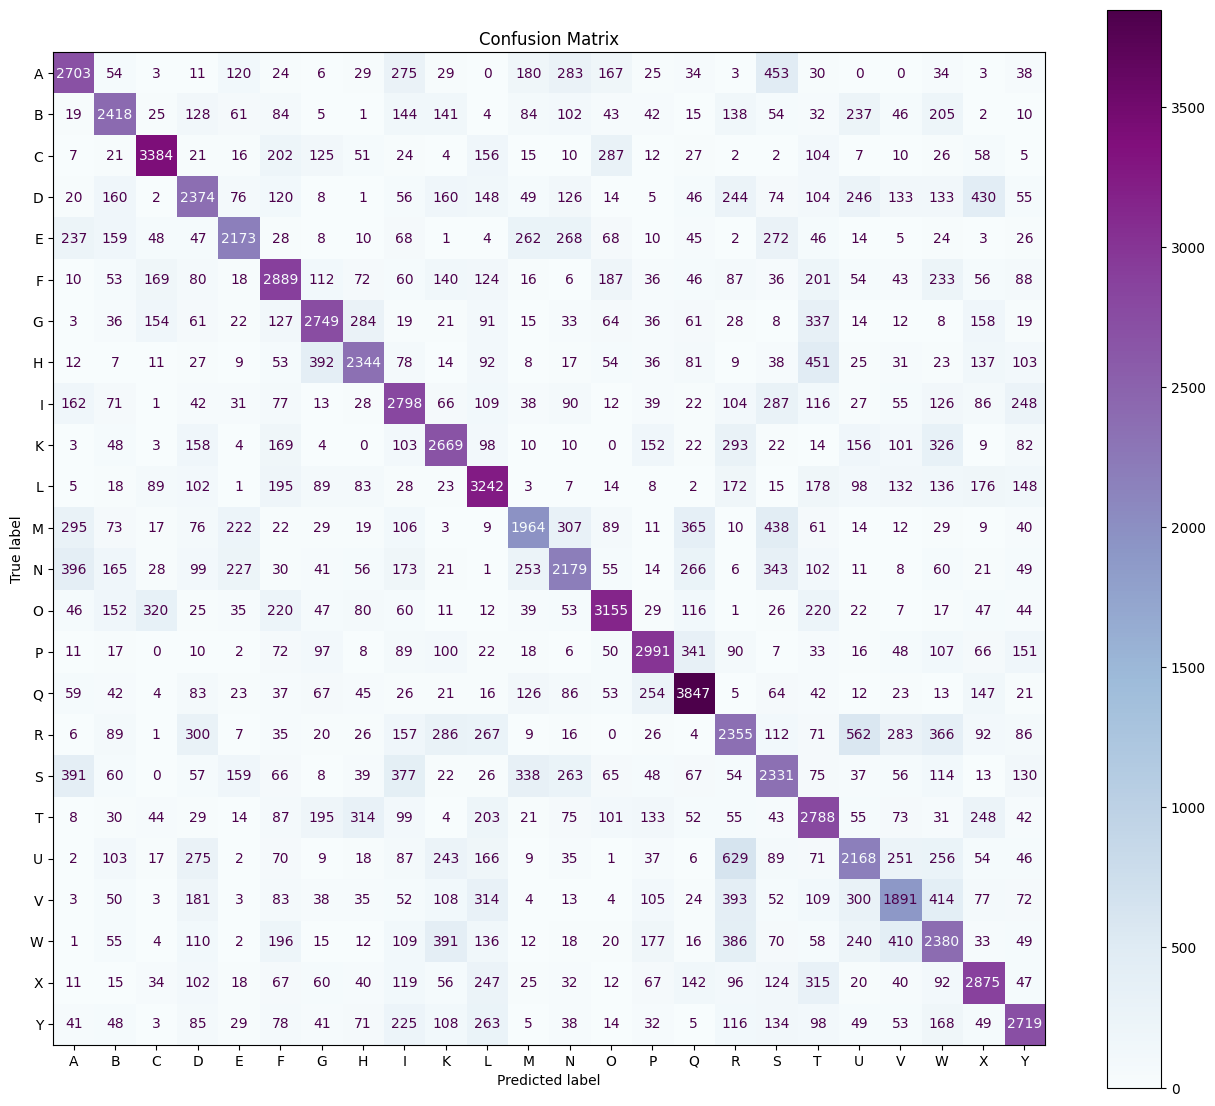

In [ ]:
evaluate_model(y_train, y_pred_lr_train, letters)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


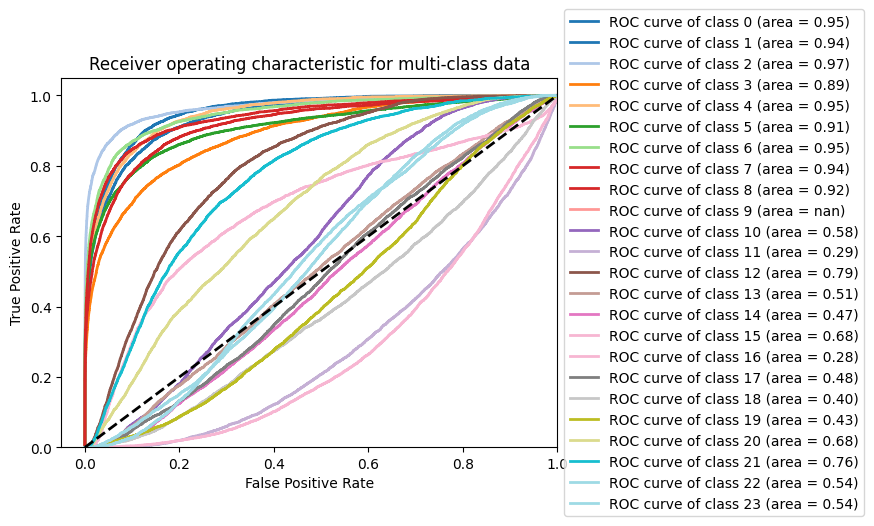

In [ ]:
from matplotlib import cm

n_classes = len(np.unique(y_train))
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_train == i, classifiers.predict_proba(X_train_lda)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
colors = cm.tab20(np.linspace(0, 1, n_classes))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


In [ ]:
# testing logistic regression on test data
y_pred_lr_test = lr.fit(X_train_lda, y_train).predict(X_test_lda)

Accuracy: 0.42498605688789737
Classification report:
              precision    recall  f1-score   support

           A       0.44      0.53      0.48      1324
           B       0.63      0.49      0.55      1728
           C       0.68      0.60      0.64      1240
           D       0.36      0.47      0.41       980
           E       0.61      0.44      0.51      1992
           F       0.41      0.48      0.44       988
           G       0.54      0.48      0.51      1392
           H       0.76      0.48      0.59      1744
           I       0.33      0.37      0.35      1152
           K       0.41      0.39      0.40      1324
           L       0.48      0.73      0.58       836
           M       0.42      0.26      0.32      1576
           N       0.26      0.27      0.26      1164
           O       0.47      0.42      0.45       984
           P       0.72      0.63      0.67      1388
           Q       0.35      0.61      0.45       656
           R       0.08     

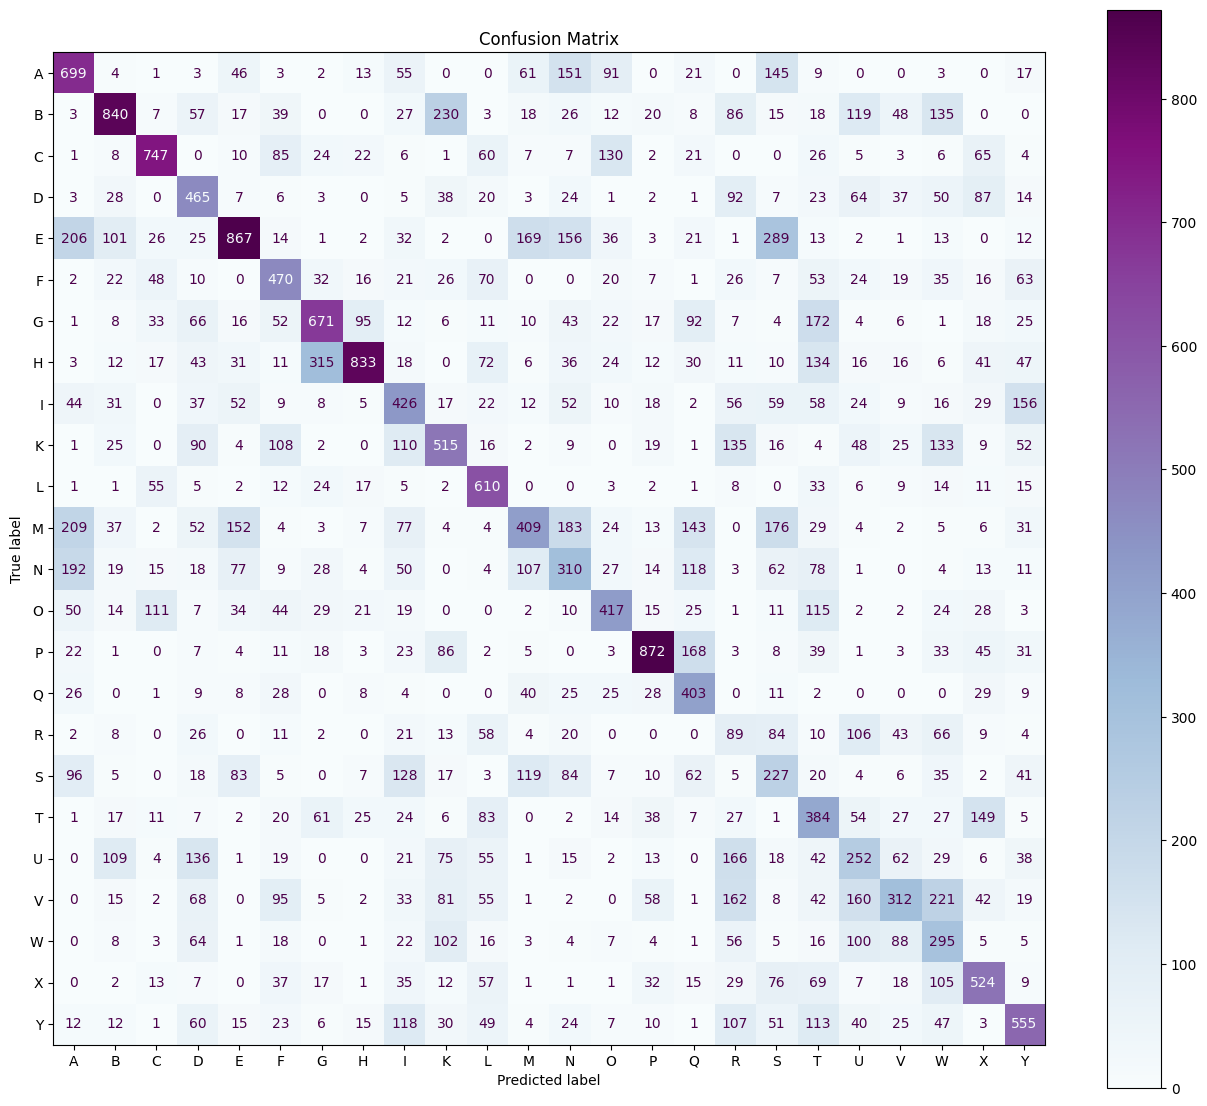

In [ ]:
evaluate_model(y_test, y_pred_lr_test, letters)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


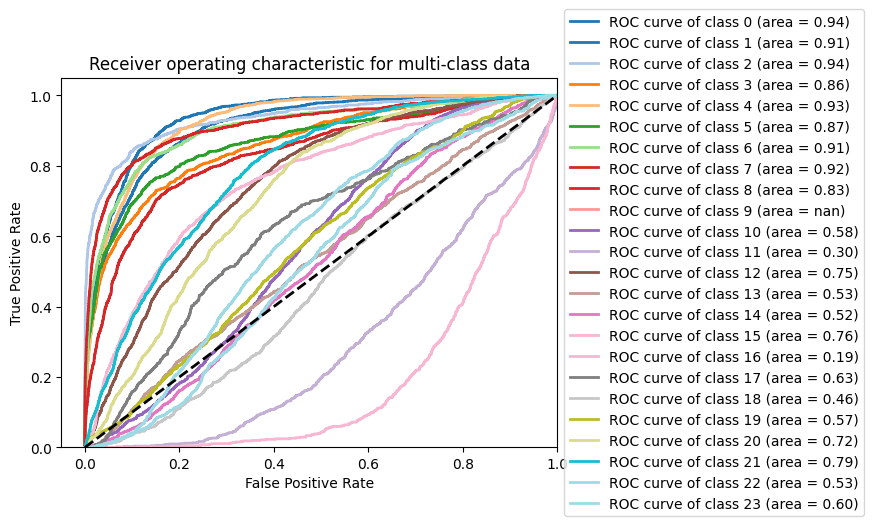

In [ ]:
from matplotlib import cm

n_classes = len(np.unique(y_test))
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, classifiers.predict_proba(X_test_lda)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
colors = cm.tab20(np.linspace(0, 1, n_classes))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


In [ ]:
#

# Randomized search on 100k data

In [17]:
from scipy.stats import uniform
lr = LogisticRegression()

max_iter = range(100, 1000, 100) # reduced range
solver = ['liblinear']
warm_start = [True, False]
C = [0.1, 1, 10] # reduced range
penalty = ["l1", "l2"]
random_grid ={
    'max_iter' : max_iter,
    'warm_start' : warm_start,
    'solver' : solver,
    'C' : C,
    'penalty' : penalty,
}

In [18]:
lr_search = RandomizedSearchCV(estimator = lr,
                                   param_distributions = random_grid,
                                   scoring = 'accuracy',
                                   verbose = 3, 
                                   random_state = 42,
                                  )

In [ ]:
lr_search.fit(X_train_sc, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
print('Best hyperparameters:', lr_search.best_params_)
print('Best score:', lr_search.best_score_)

In [ ]:
#Defining Logistic with best parameters
lr = LogisticRegression(C = 3.4647045830997407, max_iter=3171, penalty="l2", solver="liblinear", warm_start="False")

In [ ]:
# applying Logistic regression on standerdized data and predicting on train
y_pred_lr_sc = lr.fit(X_train_sc, y_train).predict(X_train_sc)

print(f"Accuracy: {accuracy_score(y_train, y_pred_lr_sc)}")
print("Classification report:")
print(classification_report(y_train, y_pred_lr_sc, target_names=letters))

In [ ]:
# applying Logistic regression on standerdized data and predicting on test data
y_pred_lr_sc = lr.fit(X_train_sc, y_train).predict(X_test_sc)

print(f"Accuracy: {accuracy_score(y_test, y_pred_lr_sc)}")
print("Classification report:")
print(classification_report(y_test, y_pred_lr_sc, target_names=letters))